## Fashion Mnist (Multiclass Classification)

Building multiclass classification model, using Fashion Mnist dataset

## Collecting the dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

## Visualizing the dataset

In [2]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

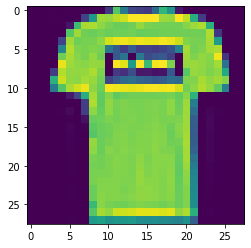

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[1]);

In [5]:
train_labels[1]

0

In [6]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Bag')

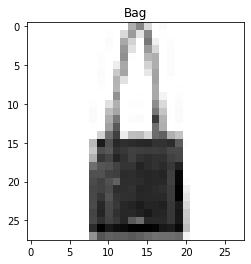

In [7]:
# Plot an example image and its label
index = 200
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

In [8]:
len(train_labels)

60000

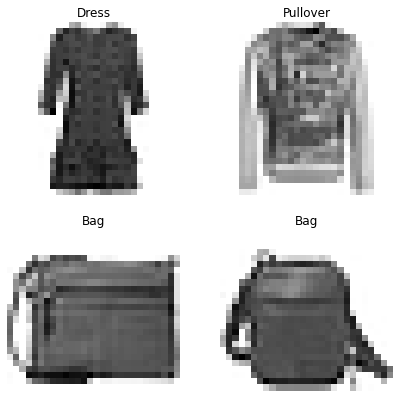

In [9]:
# Plot multiplt random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Data Preprocessing - Normalizing

In [10]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized)

In [11]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255
test_data_norm = test_data / 255

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

## Building a multi-class classification model

### Model 1

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels),
                           verbose=0)

In [13]:
model_1.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.8014


[0.5658250451087952, 0.8014000058174133]

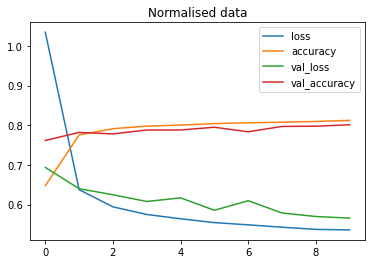

In [14]:
import pandas as pd

# Plot data loss curves
pd.DataFrame(history_1.history).plot(title='Normalised data');

### Model 2

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels),
                        verbose=0)

In [16]:
model_2.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.8379


[0.4738557040691376, 0.8378999829292297]

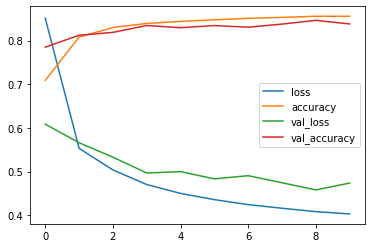

In [17]:
pd.DataFrame(history_2.history).plot()

### Model 3

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels),
                        verbose=0)

In [19]:
model_3.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8471


[0.44481655955314636, 0.847100019454956]

### Model 4

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels),
                        verbose=0)

In [21]:
model_4.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8648


[0.3876206576824188, 0.864799976348877]

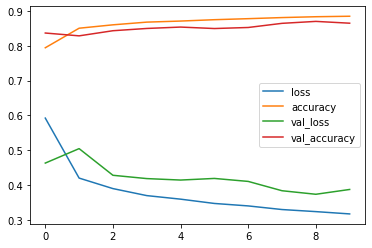

In [22]:
pd.DataFrame(history_4.history).plot()

### Model 5

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=12,
                        validation_data=(test_data_norm, test_labels),
                        verbose=0)

In [24]:
model_5.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8725


[0.36292266845703125, 0.8725000023841858]

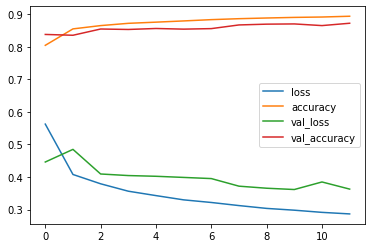

In [25]:
pd.DataFrame(history_5.history).plot();

From all the models, model 5 showed better results

## Evaluating the model

In [26]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix 
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion Matrix',
           xlabel='Predicted Label',
           ylabel='True Label',
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                 horizontalalignment='center',
                 color='white' if cm[i, j] > threshold else 'black',
                 size=text_size)

In [27]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
# Make some predictions with our model
y_probs = model_5.predict(test_data_norm)

# View the first 5 predicitons 
y_probs[:5]

array([[1.5319928e-06, 1.0393508e-08, 1.9627719e-06, 1.0721804e-05,
        2.9547566e-06, 8.9779254e-03, 2.9101295e-06, 5.9113514e-02,
        3.9239851e-04, 9.3149602e-01],
       [1.7450484e-05, 5.9168025e-11, 9.8772418e-01, 6.5076517e-07,
        4.9614902e-03, 3.0977157e-15, 7.2961911e-03, 4.6937340e-19,
        1.8653679e-09, 1.4331993e-15],
       [2.1641212e-07, 9.9999762e-01, 4.0083541e-09, 2.1261378e-06,
        9.9484367e-09, 4.1811077e-18, 1.7577568e-08, 4.5857022e-22,
        4.4124093e-10, 6.6599833e-20],
       [8.7108454e-08, 9.9997830e-01, 3.5039787e-09, 2.1584754e-05,
        1.9587425e-09, 7.3083344e-14, 2.8977961e-08, 5.7579133e-19,
        3.0517592e-11, 9.0659842e-16],
       [2.3224683e-01, 1.5891704e-04, 3.6290608e-02, 4.0045176e-03,
        2.5585508e-02, 1.5980554e-09, 6.9763744e-01, 1.0823260e-09,
        4.0761144e-03, 3.0894366e-08]], dtype=float32)

In [29]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.5319928e-06, 1.0393508e-08, 1.9627719e-06, 1.0721804e-05,
        2.9547566e-06, 8.9779254e-03, 2.9101295e-06, 5.9113514e-02,
        3.9239851e-04, 9.3149602e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [30]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[839,   0,  11,  33,   7,   1, 101,   0,   8,   0],
       [  2, 961,   0,  27,   6,   0,   4,   0,   0,   0],
       [ 20,   1, 707,  13, 168,   1,  90,   0,   0,   0],
       [ 20,   3,   8, 908,  24,   2,  31,   0,   4,   0],
       [  0,   1,  58,  50, 841,   0,  50,   0,   0,   0],
       [  0,   0,   0,   0,   0, 946,   0,  23,   2,  29],
       [139,   1,  57,  31,  97,   1, 668,   0,   6,   0],
       [  0,   0,   0,   0,   0,  31,   0, 946,   0,  23],
       [  8,   0,   1,   7,   8,   4,  16,   5, 951,   0],
       [  0,   0,   0,   0,   0,   5,   2,  35,   0, 958]])

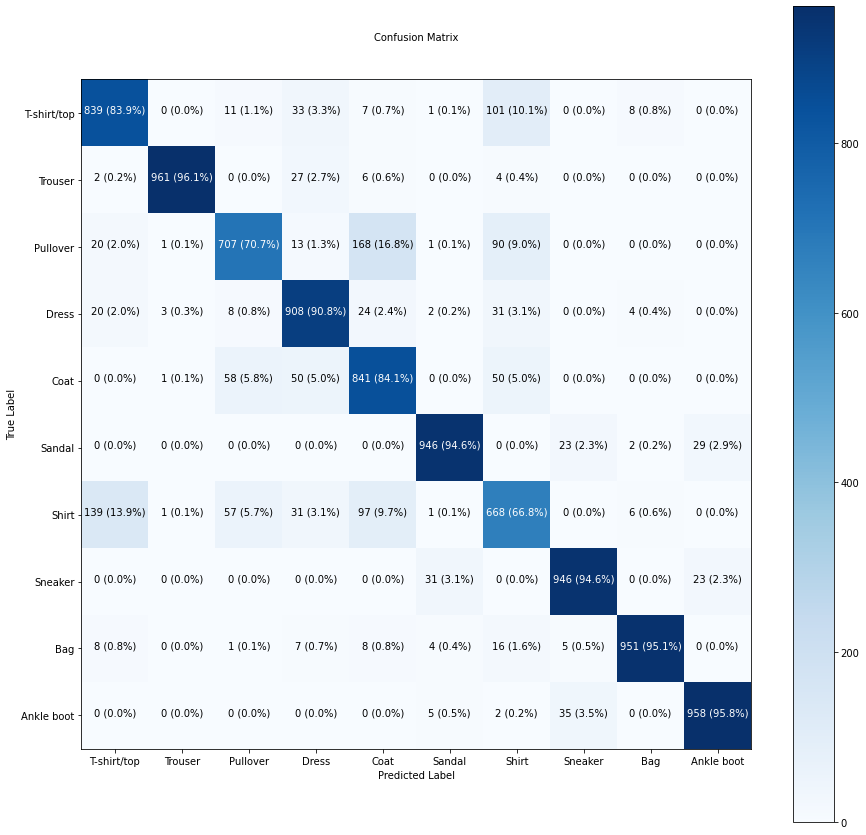

In [32]:
# Make a prettier confusion matrix
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15, 15), text_size=10)

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i] 
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    # Add xlabel information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # Set the color to green or red based on if prediction is right or wrong

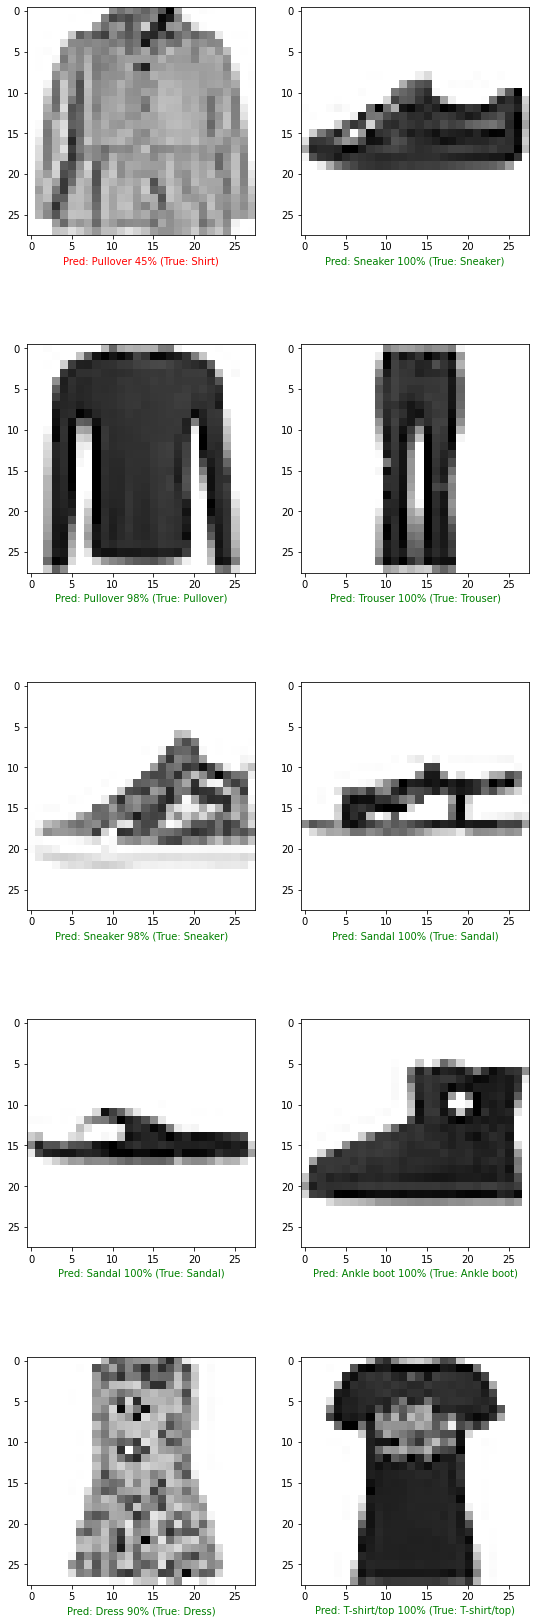

In [34]:
# Check random images as well as its predictions
plt.figure(figsize=(9, 30))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plot_random_image(model=model_5,
                  images=test_data_norm, 
                  true_labels=test_labels,
                  classes=class_names)